#  Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)                    
Length / continuous / mm / Longest shell measurement                       
Diameter / continuous / mm / perpendicular to length                       
Height / continuous / mm / with meat in shell                    
Whole weight / continuous / grams / whole abalone                   
Shucked weight / continuous / grams / weight of meat                       
Viscera weight / continuous / grams / gut weight (after bleeding)                       
Shell weight / continuous / grams / after being dried                        
Rings / integer / -- / +1.5 gives the age in years.                               

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df= pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot:>

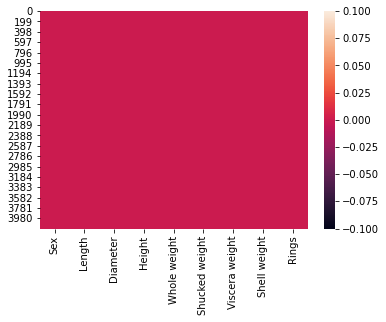

In [5]:
sns.heatmap(df.isnull())

In [6]:
sum(df.duplicated())

0

In [ ]:
sns.pairplot(df, hue='Rings')

In [7]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df['sex']=le.fit_transform(df.Sex)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [10]:
df=df.drop(columns='Sex')


In [11]:
df.sex.value_counts()

2    1528
1    1342
0    1307
Name: sex, dtype: int64

- 2    1528   M                       
- 1    1342   I              
- 0    1307   F               

In [12]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


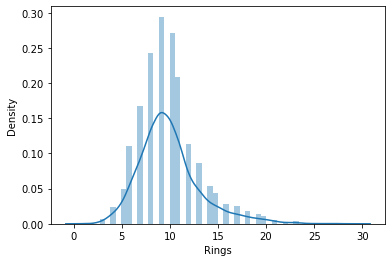

In [13]:
sns.distplot(df["Rings"])
plt.show()

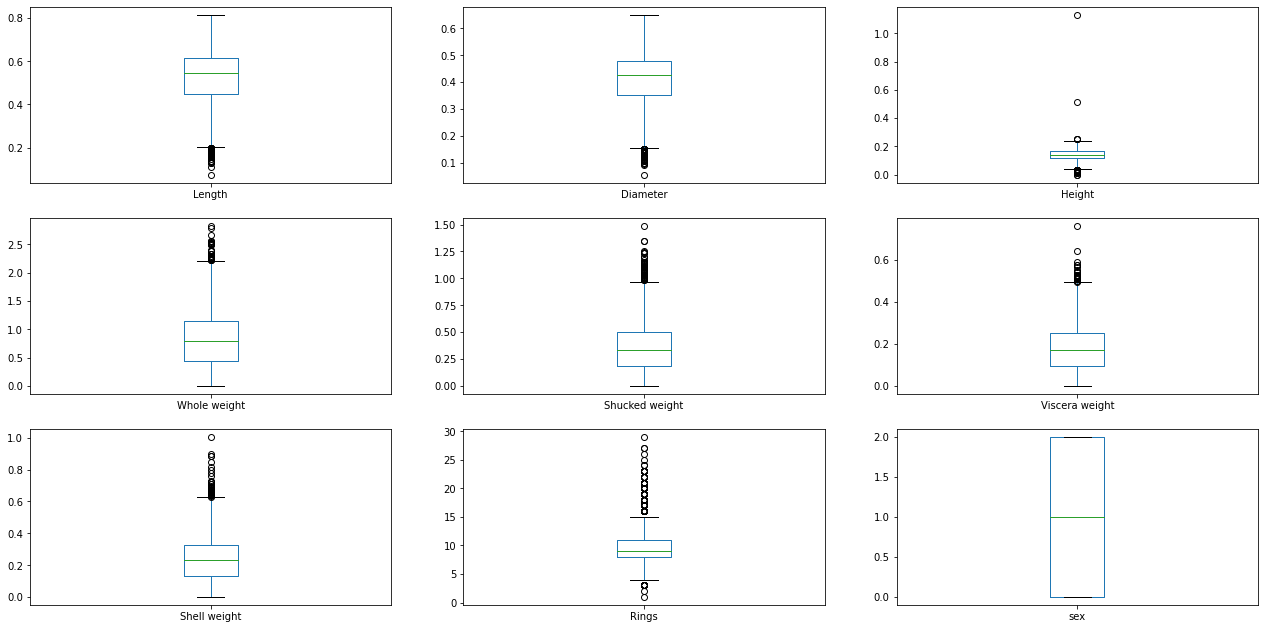

In [14]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, legend=False, figsize=(22,11))
plt.show()


In [15]:
from scipy.stats import zscore
z=zscore(df)
z

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.63821689,
         1.57154357,  1.15198011],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.21298732,
        -0.91001299,  1.15198011],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.20713907,
        -0.28962385, -1.28068972],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.49695471,
        -0.28962385,  1.15198011],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.41073914,
         0.02057072, -1.28068972],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.84048058,
         0.64095986,  1.15198011]])

In [16]:
dfn= df[(z < 3).all(axis=1)]

In [17]:
dfn.shape

(4046, 9)

 Loss of data 
(4177-4046)/4177 *100 = 3.1%

In [18]:
dfn.skew()

Length           -0.681262
Diameter         -0.648037
Height           -0.313924
Whole weight      0.329684
Shucked weight    0.453702
Viscera weight    0.432857
Shell weight      0.342641
Rings             0.687987
sex              -0.095167
dtype: float64

<AxesSubplot:>

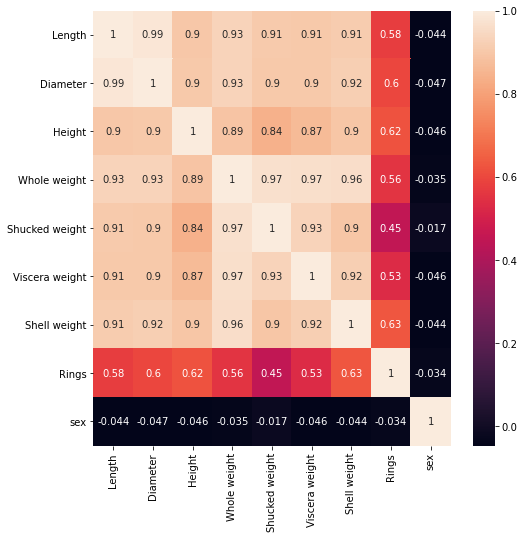

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(dfn.corr(),annot=True)

<AxesSubplot:>

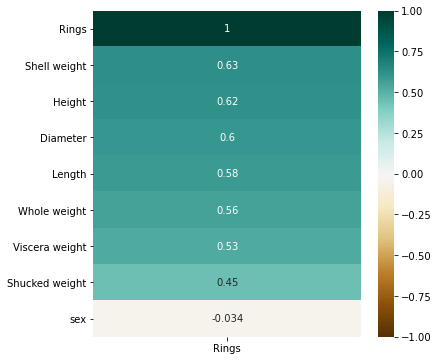

In [20]:
plt.figure(figsize=(6,6))
sns.heatmap(dfn.corr()[['Rings']].sort_values(by='Rings',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='BrBG') 

Every columns is related to the target variable "Ring"                
except the 'sex' column - its mostly linear so will drop it

# Creating train_test_split

In [21]:
x=dfn.drop(["Rings","sex"],axis=1)
y=dfn["Rings"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics import mean_squared_error, r2_score

In [50]:
def model_select (model):
    maxscore=0
    maxrandomstate=0
    for i in range (50,100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
        md=model()
        md.fit(X_train,y_train.values.ravel())
        mdpredict=md.predict(X_test)
        r2score=r2_score(y_test,mdpredict)
        #print("R2 score for random state {b} is {c}".format(b=x,c=r2score))
        
        if r2score>maxscore:
            maxscore=r2score
            maxrandomstate=i
    #print()
    print("Best score is {} at random state {}".format(maxscore,maxrandomstate))

In [51]:
model_select(LinearRegression)

Best score is 0.5549245216725649 at random state 68


In [52]:
model_select(RandomForestRegressor)

Best score is 0.582012411160838 at random state 76


In [53]:
model_select(DecisionTreeRegressor)

Best score is 0.24298942903611365 at random state 98


In [54]:
model_select(Ridge)

Best score is 0.5392120522361232 at random state 68


In [55]:
model_select(KernelRidge)

Best score is 0.5295889605018391 at random state 68


In [56]:
model_select(AdaBoostRegressor)

Best score is 0.4404163600821899 at random state 53


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state =76)

In [62]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predict=rf.predict(x_test)
print('r2 score : ',r2_score(y_test,predict))
print('mean squared error : ',mean_squared_error(y_test,predict))

r2 score :  0.5901394543140176
mean squared error :  3.51309118616145


In [63]:
from pprint import pprint
rf = RandomForestRegressor(random_state = 76)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 76,
 'verbose': 0,
 'warm_start': False}


In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
   
}


In [40]:
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [65]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}

In [67]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    r2score=r2_score(y_test,predictions)
    

    print('Model Performance')
    print('r2 score = ', r2score)
    print('mean_squared_error:  ', mean_squared_error(y_test,predictions))
    
    return 

In [68]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test) 

Model Performance
r2 score =  0.5966510973176804
mean_squared_error:   3.4572770906492556


# Saving the model 

In [69]:
import joblib 
joblib.dump(rf,'abalone.pkl')

['abalone.pkl']

In [71]:
#load the model
model = joblib.load('abalone.pkl')
model.fit(x_train, y_train)
predy =model.predict(x_test)
print('r2 score=',r2_score(y_test,predy))
mean_squared_error(y_test,predy)

r2 score= 0.600266522314594


3.4262877265238876